<a href="https://colab.research.google.com/github/Shreeraj98/Statistical-Toolbox-for-easy-access/blob/main/Tools/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏠 **Regression Analysis**

Predict outcomes using simple and multiple linear regression models.

📈 Simple Linear Regression Summary (Price ~ Area):

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     25.92
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.72e-06
Time:                        15:02:06   Log-Likelihood:                -1162.5
No. Observations:                 100   AIC:                             2329.
Df Residuals:                      98   BIC:                             2334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


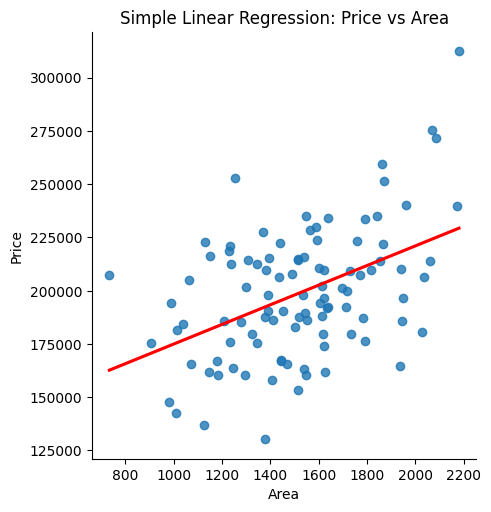

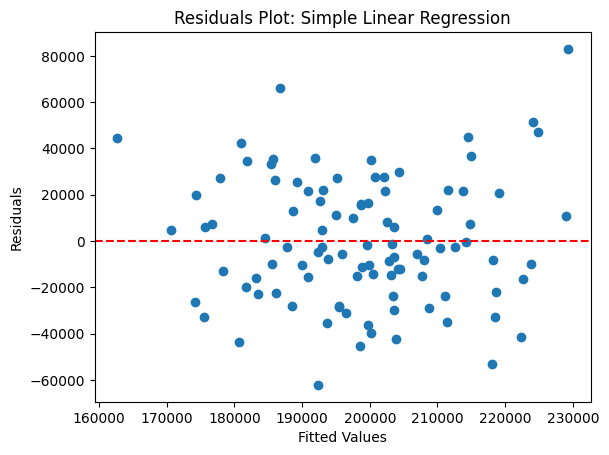


📊 Multiple Linear Regression Summary (Price ~ Area + Bedrooms + Bathrooms):

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     53.89
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.65e-20
Time:                        15:02:08   Log-Likelihood:                -1124.9
No. Observations:                 100   AIC:                             2258.
Df Residuals:                      96   BIC:                             2268.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

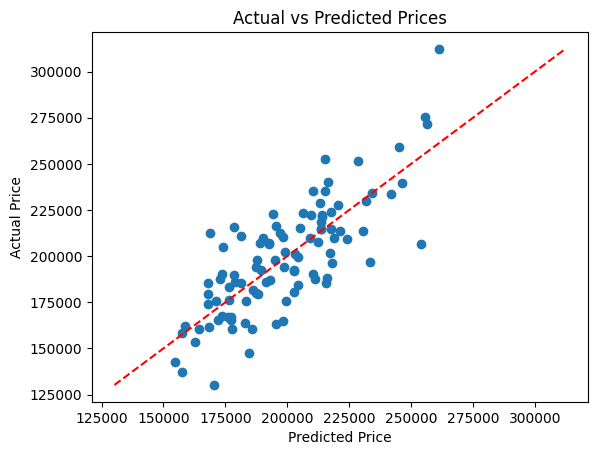

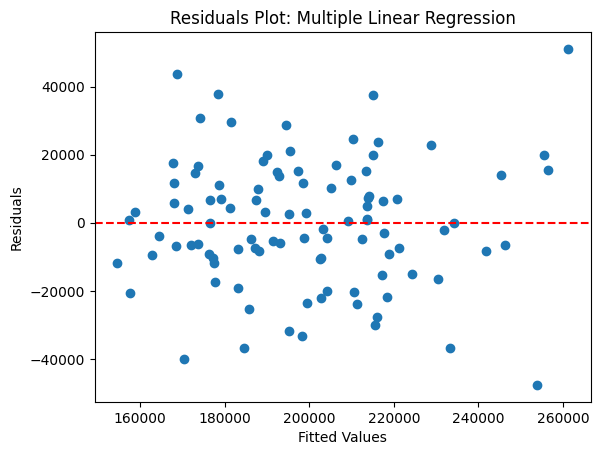

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Simulated dataset for house prices
np.random.seed(0)
n = 100
area = np.random.normal(1500, 300, n)  # square feet
bedrooms = np.random.randint(1, 5, n)
bathrooms = np.random.randint(1, 3, n)
noise = np.random.normal(0, 20000, n)

# Price = base + (area * 50) + (bedrooms * 20000) + (bathrooms * 15000) + noise
price = 50000 + (area * 50) + (bedrooms * 20000) + (bathrooms * 15000) + noise

df = pd.DataFrame({
    'Price': price,
    'Area': area,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms
})

# =========================
# 🔹 Simple Linear Regression (Price vs Area)
# =========================
X_simple = df[['Area']]
y = df['Price']

model_simple = sm.OLS(y, sm.add_constant(X_simple)).fit()
print("📈 Simple Linear Regression Summary (Price ~ Area):\n")
print(model_simple.summary())

# Plot regression line
sns.lmplot(x='Area', y='Price', data=df, ci=None, line_kws={'color':'red'})
plt.title('Simple Linear Regression: Price vs Area')
plt.show()

# Residuals plot
residuals_simple = y - model_simple.predict(sm.add_constant(X_simple))
plt.scatter(model_simple.predict(sm.add_constant(X_simple)), residuals_simple)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot: Simple Linear Regression")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# =========================
# 🔸 Multiple Linear Regression
# =========================
X_multi = df[['Area', 'Bedrooms', 'Bathrooms']]
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(y, X_multi).fit()

print("\n📊 Multiple Linear Regression Summary (Price ~ Area + Bedrooms + Bathrooms):\n")
print(model_multi.summary())

# Predicted vs actual plot
plt.scatter(model_multi.fittedvalues, y)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.show()

# Residuals
residuals_multi = model_multi.resid
plt.scatter(model_multi.fittedvalues, residuals_multi)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Multiple Linear Regression")
plt.show()
